# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking the size of the dataset.

In [3]:
df.shape

(1338, 7)

### Checking whether the null values are present or not in the dataset.

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Showing all the information about the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Showing the descriptive statistics of the dataset.

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

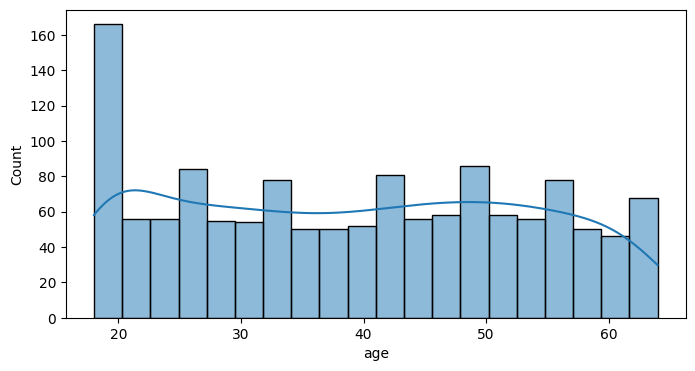

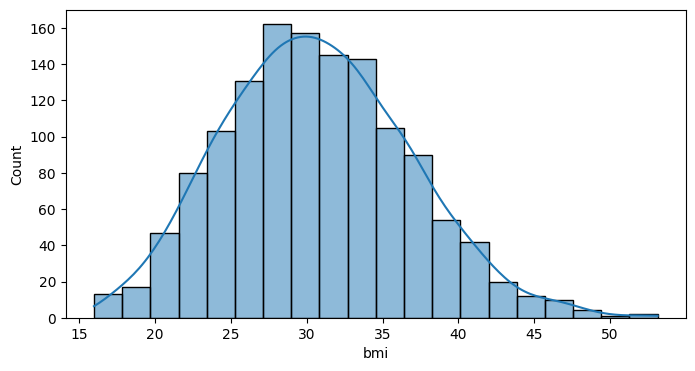

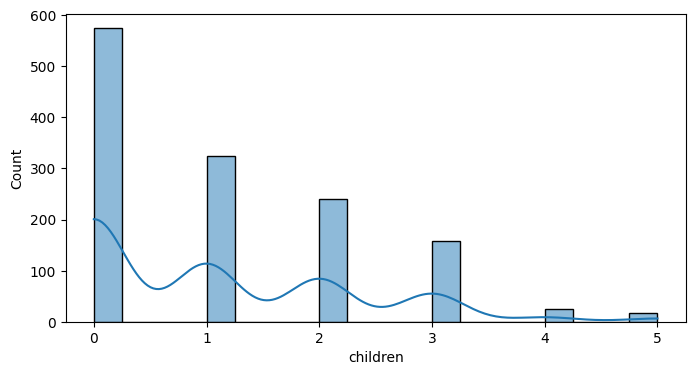

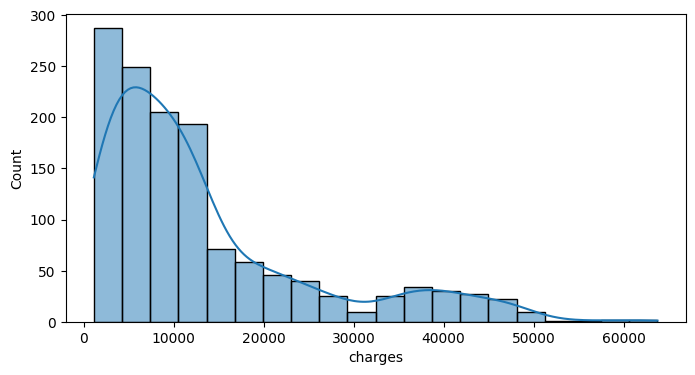

In [8]:
numeric_columns = ['age','bmi','children','charges']
for col in numeric_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col],kde=True,bins=20)
    plt.show()

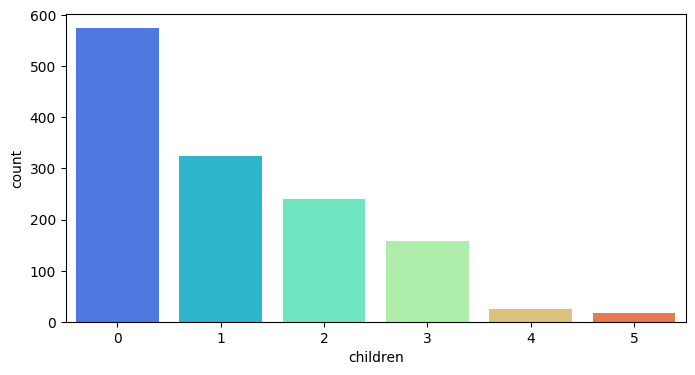

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['children'],palette='rainbow')
plt.show()

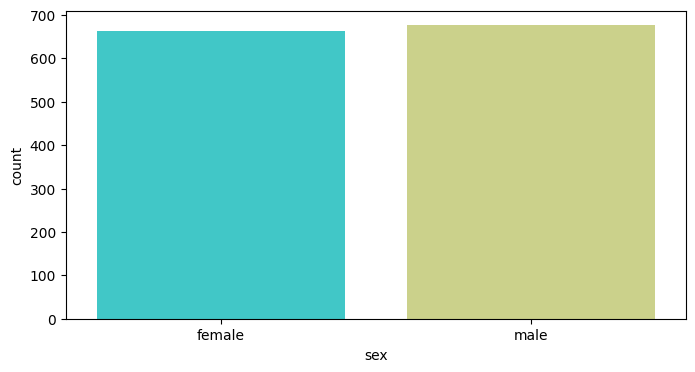

In [10]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['sex'],palette='rainbow')
plt.show()

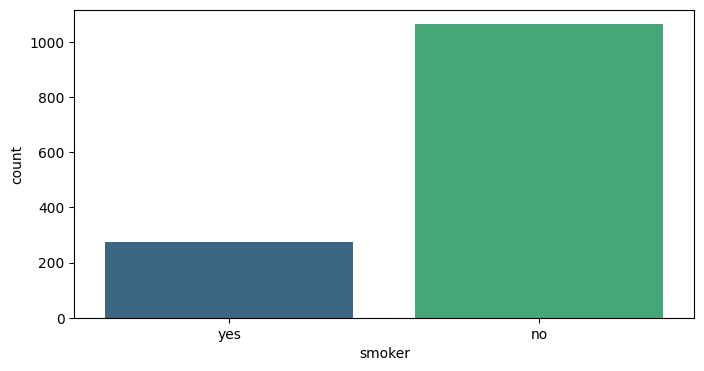

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['smoker'],palette='viridis')
plt.show()

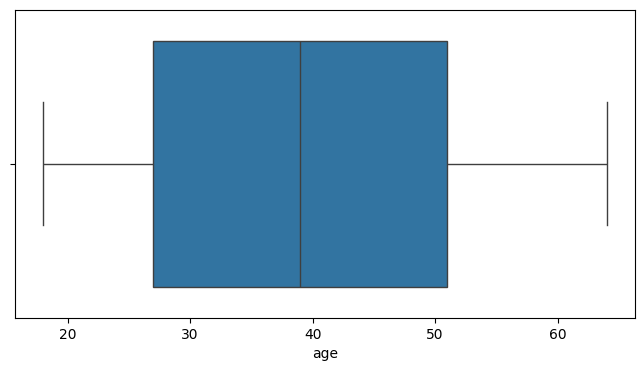

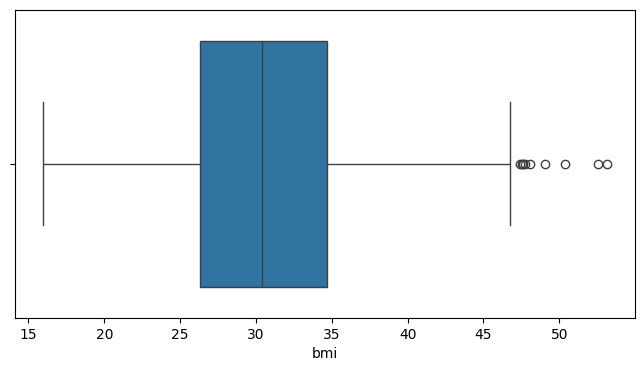

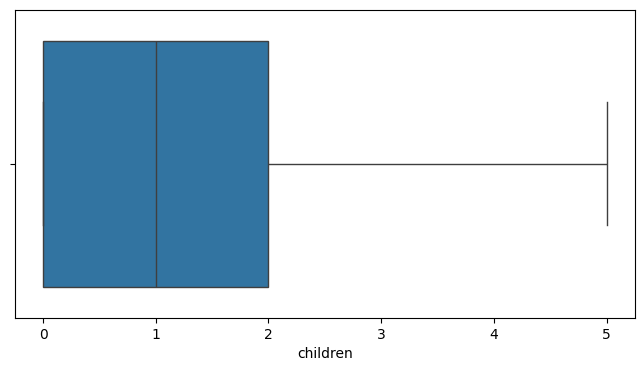

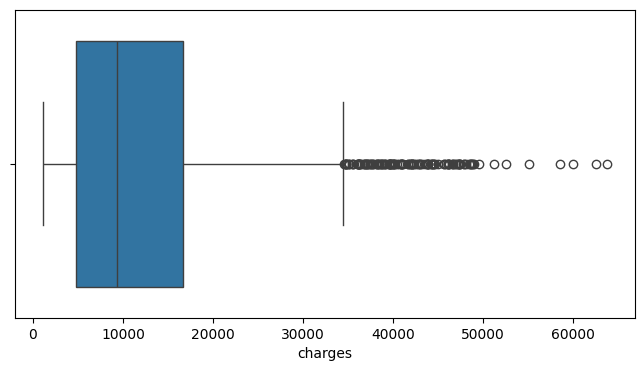

In [12]:
for col in numeric_columns:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.show()

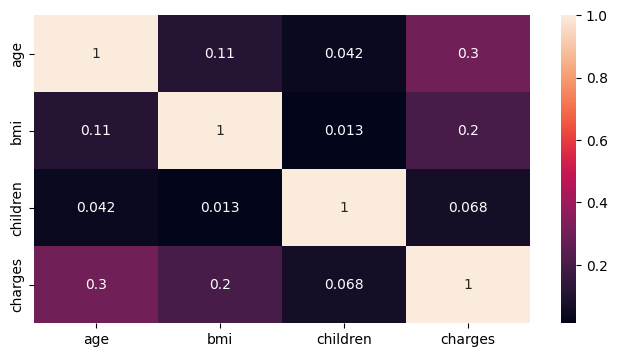

In [13]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

# *Data Cleaning and Preprocessing*

In [14]:
df_cleaned = df.copy()

In [15]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df_cleaned.shape

(1338, 7)

In [17]:
df_cleaned.drop_duplicates(inplace=True)

In [18]:
df_cleaned.shape

(1337, 7)

In [19]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [20]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [21]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [22]:
df_cleaned['sex'] = df_cleaned['sex'].map({"male" : 0, "female" : 1})

In [23]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [24]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [25]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({"yes" : 1,"no" : 0})

In [26]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [27]:
df_cleaned.rename(columns={
    'sex' : 'is_female',
    'smoker' : 'is_smoker'
},inplace=True)

In [28]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [29]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [30]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['region'],drop_first=False)

In [31]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [32]:
df_cleaned = df_cleaned.astype(int)

In [33]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,0,1
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0
3,33,0,22,0,0,21984,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0


# *Feature Engineering and Extraction*

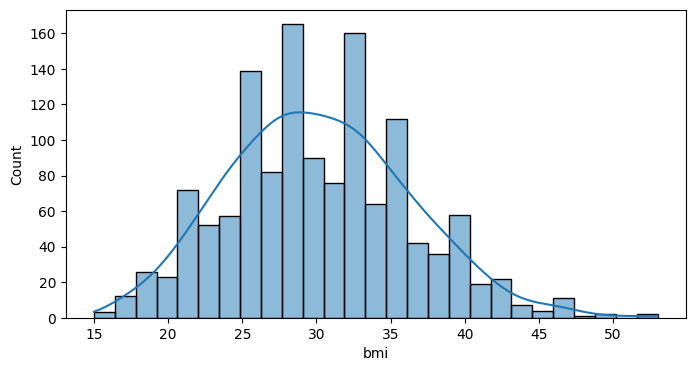

In [34]:
plt.figure(figsize=(8,4))
sns.histplot(df_cleaned['bmi'],kde=True)
plt.show()

In [35]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins = [0, 18.5, 24.9, 29.9, float('inf')],
    labels = ["Underweight", "Normal", "Overweight", "Obesity"]
)

In [36]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,0,1,Overweight
1,18,0,33,1,0,1725,0,0,1,0,Obesity
2,28,0,33,3,0,4449,0,0,1,0,Obesity
3,33,0,22,0,0,21984,0,1,0,0,Normal
4,32,0,28,0,0,3866,0,1,0,0,Overweight


In [37]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['bmi_category'],drop_first=False)

In [38]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obesity
0,19,1,27,0,1,16884,0,0,0,1,False,False,True,False
1,18,0,33,1,0,1725,0,0,1,0,False,False,False,True
2,28,0,33,3,0,4449,0,0,1,0,False,False,False,True
3,33,0,22,0,0,21984,0,1,0,0,False,True,False,False
4,32,0,28,0,0,3866,0,1,0,0,False,False,True,False


In [39]:
df_cleaned = df_cleaned.astype(int)

In [40]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obesity
0,19,1,27,0,1,16884,0,0,0,1,0,0,1,0
1,18,0,33,1,0,1725,0,0,1,0,0,0,0,1
2,28,0,33,3,0,4449,0,0,1,0,0,0,0,1
3,33,0,22,0,0,21984,0,1,0,0,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0,0,0,1,0


In [41]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obesity'],
      dtype='object')

### Standard Scaling for the Age, BMI, and Children columns 

In [42]:
from sklearn.preprocessing import StandardScaler
cols = ['age','bmi','children']
scaler = StandardScaler()

df_cleaned[cols] = scaler.fit_transform((df_cleaned[cols]))

In [43]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,0,1,0,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,0,1,0,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,0,1,0,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,1,0,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,1,0,0,0,0,1,0


In [44]:
from scipy.stats import pearsonr

#--------------------------------
# Pearson Correlation Calculation
#--------------------------------

# List of features to check against the target
selected_features = [
    'age', 'bmi', 'children','is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obesity'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns = ['Feature', 'Pearson Correlation'])
correlation_df.sort_values('Pearson Correlation', ascending = False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obesity,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
5,region_northwest,-0.038695
7,region_southwest,-0.043637
3,is_female,-0.058046
8,bmi_category_Normal,-0.104042


In [45]:
categorical_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obesity'
]

In [46]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in categorical_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_value < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistics': chi2_stat,
        'p_value': p_value,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistics,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obesity,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [47]:
final_df = df_cleaned[['age', 'is_female','bmi','children', 'is_smoker', 'charges', 'region_southeast', 'bmi_category_Obesity']]

In [48]:
final_df.head()

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0
1,-1.511647,0,0.462463,-0.079442,0,1725,1,1
2,-0.799350,0,0.462463,1.580143,0,4449,1,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,0


In [49]:
from sklearn.model_selection import train_test_split

In [51]:
X = final_df.drop('charges',axis=1)
y = final_df['charges']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression

In [55]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [56]:
y_prediction = model.predict(X_test)

In [60]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_prediction)
r2
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))

In [61]:
adjusted_r2

0.7987962362937233